This notebook has as goal present it as homework result of Laboratory 1 course of Master in Finance on Universidad Externado de Colombia. I need to show the profits, losses and equilibrium points of each of strategies presented here.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""
These are lambda functions who calculate the Call and Put options having a prime
on each case. For example when you are long (B - Buy) on any kind of option -Put or Call-
you must pay a prime, otherwise if you are short (S - Sell) you will recieve a prime
for the option you are selling.
"""
call_payoff = lambda S, K, prime, bs: max(S-K,0)-prime if bs == 'B' else -max(S-K,0)+prime
put_payoff = lambda S, K, prime, bs: max(K-S,0)-prime if bs == 'B' else -max(K-S,0)+prime

In [3]:
def build_strategy(strategy:dict, price_range:list, adding:bool=True) -> list:
    """
    This function will build the strategy payoff taking as input
    a dictionary with each strategy leg
    
    parameters:
    - strategy           : (dict) Strategy legs
    - P_range            : (list) Range of prices on which will be calculated each leg's payoff
    - adding             : (bool) it defines if this functions returns a consolidated payoff or instead of
                                  returns each leg's payoff
                                  
    return
    List with payoffs, consolidated or splited by each strategy's leg depending of :adding: parameter
    """
    pay_off_total = [] # Empty variable to store the results of each leg's payoff
    for leg_i in strategy.keys(): # instruction to iterate each strategy leg
        pay_off_total.append( # Appending result
            list( # cast to list type
                map( # Mapping a function to each element of any list
                    lambda x: # Lambda function habing as parameter x
                    strategy[leg_i]['option'](x, strategy[leg_i]['K'],strategy[leg_i]['prime'], strategy[leg_i]['BS']), # Calling of Put/Call lambda function of any strategy's legs
                    price_range # list of prices to be calculated within Put - Call lambda function
                )
            )
        )
    if adding: # If you want to return the payoffs as consolidated this is true, otherwise it will return separeted payoffs
        pay_off_total = np.sum(np.array(pay_off_total),axis=0) # Adding of each strategy's leg payoff
    return pay_off_total

def define_range_P(strategy:dict, inf_delta:int=50, sup_delta:int=50)->list:
    """
    Function to retrieve a range of prices to be evaluated when you plot the
    strategies payoff
    """
    range_K = [strategy[key_i]['K'] for key_i in strategy.keys()] # Retrieve each leg's Strike

    min_ = min(range_K) - inf_delta # defining as min price in the price range the lower in leg's strike minus a inferior delta
    max_ = max(range_K) + sup_delta # defining as max price in the price range the greater in leg's strike plus a superior delta
    range_ = np.arange(min_,max_,0.2) # building the list of prices separated by steps of 0.2 of distance
    return range_

def plot_result(P_range:list, pay_off_total:list, title_:str, with_zero_line:bool=True)->None:
    """
    function to plot the result of each strategy
    """
    plt.plot(P_range , pay_off_total) # Plot the range of prices -X axis- and strategy payoff -Y axis-
    plt.title(title_) # Setting a tittle on plot
    plt.ylabel('PayOff Portafolio') # Setting the label of Y-axis
    plt.xlabel('Precio') # Setting the label of X-axis
    if with_zero_line: # If :with_zero_line: is True, the plot will draw a horizontal line pointing to zero level on the plot
        plt.axhline(0, alpha=0.4, c='red')
    plt.grid() # Adding grid on the plot
    plt.show() # showing the plot

# Straddle

## Long

In [4]:
long_straddle = {
    'leg_0' : {'BS' : 'B', 'option' : call_payoff, 'K': 30, 'prime' : 5},
    'leg_1' : {'BS' : 'B', 'option' : put_payoff, 'K': 30, 'prime' : 3}
}
P_range = define_range_P(strategy=long_straddle)

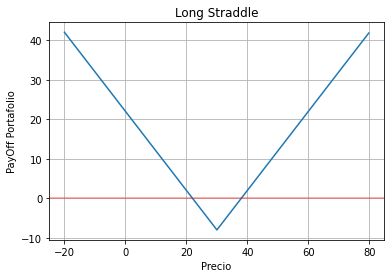

In [5]:
pay_off_total = build_strategy(strategy=long_straddle, price_range=P_range)
plot_result(P_range, pay_off_total, 'Long Straddle')

## Short

In [6]:
short_straddle = {
    'leg_0' : {'BS' : 'S', 'option' : call_payoff, 'K': 60, 'prime' : 8},
    'leg_1' : {'BS' : 'S', 'option' : put_payoff, 'K': 60, 'prime' : 6}
}
P_range = define_range_P(strategy=short_straddle)

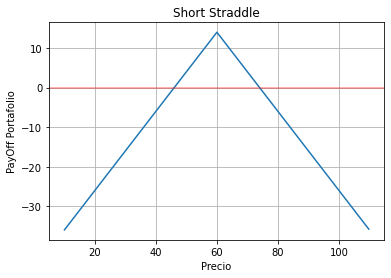

In [7]:
pay_off_total = build_strategy(strategy=short_straddle, price_range=P_range)
plot_result(P_range, pay_off_total, 'Short Straddle')

# Strangle

## Long

In [8]:
long_strangle = {
    'leg_0' : {'BS' : 'B', 'option' : call_payoff, 'K': 30, 'prime' : 4},
    'leg_1' : {'BS' : 'B', 'option' : put_payoff, 'K': 20, 'prime' : 6}
}
P_range = define_range_P(strategy=long_strangle)

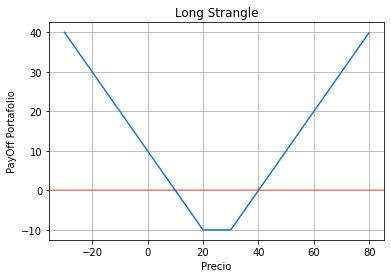

In [9]:
pay_off_total = build_strategy(strategy=long_strangle, price_range=P_range)
plot_result(P_range, pay_off_total, 'Long Strangle')

## Short

In [10]:
short_strangle = {
    'leg_0' : {'BS' : 'S', 'option' : call_payoff, 'K': 70, 'prime' : 8},
    'leg_1' : {'BS' : 'S', 'option' : put_payoff, 'K': 50, 'prime' : 4}
}
P_range = define_range_P(strategy=short_strangle)

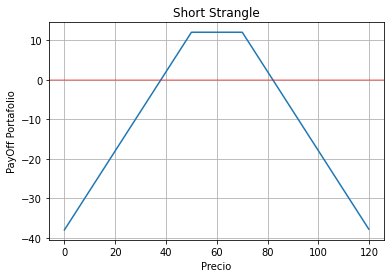

In [11]:
pay_off_total = build_strategy(strategy=short_strangle, price_range=P_range)
plot_result(P_range, pay_off_total, 'Short Strangle')

# Butterfly

## Short Call

In [12]:
short_call_butterfly = {
    'leg_0' : {'BS' : 'S', 'option' : call_payoff, 'K': 250, 'prime' : 60},
    'leg_1' : {'BS' : 'B', 'option' : call_payoff, 'K': 300, 'prime' : 30},
    'leg_2' : {'BS' : 'B', 'option' : call_payoff, 'K': 300, 'prime' : 30},
    'leg_3' : {'BS' : 'S', 'option' : call_payoff, 'K': 350, 'prime' : 15}
}
P_range = define_range_P(strategy=short_call_butterfly, inf_delta=100, sup_delta=100)

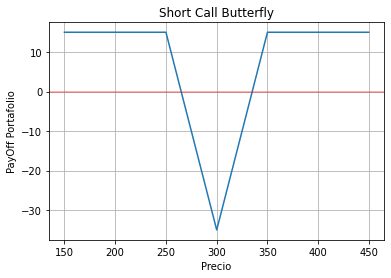

In [13]:
pay_off_total = build_strategy(strategy=short_call_butterfly, price_range=P_range)
plot_result(P_range, pay_off_total, 'Short Call Butterfly')

## Short Put

In [14]:
short_put_butterfly = {
    'leg_0' : {'BS' : 'S', 'option' : put_payoff, 'K': 10, 'prime' : 4},
    'leg_1' : {'BS' : 'B', 'option' : put_payoff, 'K': 22, 'prime' : 6},
    'leg_2' : {'BS' : 'B', 'option' : put_payoff, 'K': 22, 'prime' : 6},
    'leg_3' : {'BS' : 'S', 'option' : put_payoff, 'K': 34, 'prime' : 10}
}
P_range = define_range_P(strategy=short_put_butterfly, inf_delta=10, sup_delta=10)

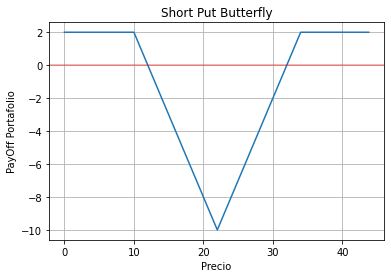

In [15]:
pay_off_total = build_strategy(strategy=short_put_butterfly, price_range=P_range)
plot_result(P_range, pay_off_total, 'Short Put Butterfly')

## Long Call

In [16]:
long_call_butterfly = {
    'leg_0' : {'BS' : 'B', 'option' : call_payoff, 'K': 80, 'prime' : 18},
    'leg_1' : {'BS' : 'S', 'option' : call_payoff, 'K': 85, 'prime' : 10},
    'leg_2' : {'BS' : 'S', 'option' : call_payoff, 'K': 85, 'prime' : 10},
    'leg_3' : {'BS' : 'B', 'option' : call_payoff, 'K': 90, 'prime' : 4}
}
P_range = define_range_P(strategy=long_call_butterfly, inf_delta=7, sup_delta=7)

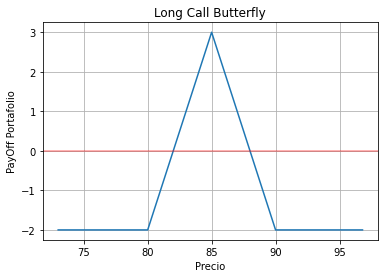

In [17]:
pay_off_total = build_strategy(strategy=long_call_butterfly, price_range=P_range)
plot_result(P_range, pay_off_total, 'Long Call Butterfly')

## Long Put

In [18]:
long_put_butterfly = {
    'leg_0' : {'BS' : 'B', 'option' : put_payoff, 'K': 15, 'prime' : 2},
    'leg_1' : {'BS' : 'S', 'option' : put_payoff, 'K': 20, 'prime' : 4},
    'leg_2' : {'BS' : 'S', 'option' : put_payoff, 'K': 20, 'prime' : 4},
    'leg_3' : {'BS' : 'B', 'option' : put_payoff, 'K': 25, 'prime' : 8}
}
P_range = define_range_P(strategy=long_put_butterfly, inf_delta=7, sup_delta=7)

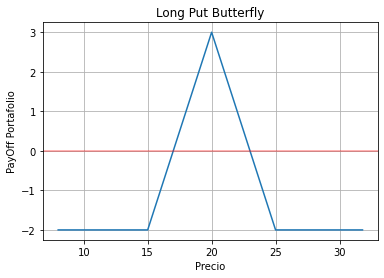

In [19]:
pay_off_total = build_strategy(strategy=long_put_butterfly, price_range=P_range)
plot_result(P_range, pay_off_total, 'Long Put Butterfly')

# Condor

## Long Call

In [20]:
long_call_condor = {
    'leg_0' : {'BS' : 'B', 'option' : call_payoff, 'K': 250, 'prime' : 60},
    'leg_1' : {'BS' : 'S', 'option' : call_payoff, 'K': 275, 'prime' : 35},
    'leg_2' : {'BS' : 'S', 'option' : call_payoff, 'K': 325, 'prime' : 25},
    'leg_3' : {'BS' : 'B', 'option' : call_payoff, 'K': 350, 'prime' : 15}
}
P_range = define_range_P(strategy=long_call_condor, inf_delta=40, sup_delta=40)

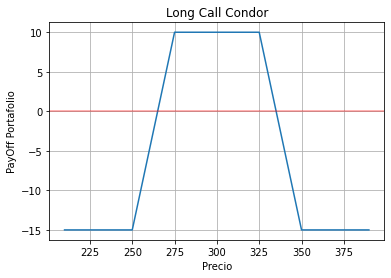

In [21]:
pay_off_total = build_strategy(strategy=long_call_condor, price_range=P_range)
plot_result(P_range, pay_off_total, 'Long Call Condor')

## Long Put

In [22]:
long_put_condor = {
    'leg_0' : {'BS' : 'B', 'option' : put_payoff, 'K': 20, 'prime' : 8},
    'leg_1' : {'BS' : 'S', 'option' : put_payoff, 'K': 25, 'prime' : 4},
    'leg_2' : {'BS' : 'S', 'option' : put_payoff, 'K': 35, 'prime' : 3},
    'leg_3' : {'BS' : 'B', 'option' : put_payoff, 'K': 40, 'prime' : 1}
}
P_range = define_range_P(strategy=long_put_condor, inf_delta=5, sup_delta=5)

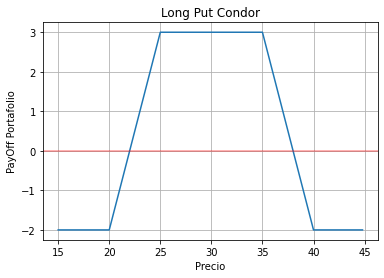

In [23]:
pay_off_total = build_strategy(strategy=long_put_condor, price_range=P_range)
plot_result(P_range, pay_off_total, 'Long Put Condor')

# Iron Butterfly

## Long 1

In [24]:
long_iron_butterfly_1 = {
    'leg_0' : {'BS' : 'B', 'option' : call_payoff, 'K': 100, 'prime' : 10},
    'leg_1' : {'BS' : 'S', 'option' : call_payoff, 'K': 110, 'prime' : 8},
    'leg_2' : {'BS' : 'B', 'option' : put_payoff, 'K': 100, 'prime' : 12},
    'leg_3' : {'BS' : 'S', 'option' : put_payoff, 'K': 90, 'prime' : 9}
}
P_range = define_range_P(strategy=long_iron_butterfly_1, inf_delta=15, sup_delta=15)

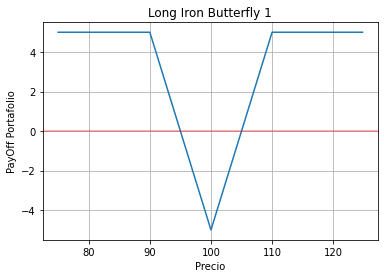

In [25]:
pay_off_total = build_strategy(strategy=long_iron_butterfly_1, price_range=P_range)
plot_result(P_range, pay_off_total, 'Long Iron Butterfly 1')

## Long 2

In [26]:
long_iron_butterfly_2 = {
    'leg_0' : {'BS' : 'B', 'option' : call_payoff, 'K': 100, 'prime' : 15},
    'leg_1' : {'BS' : 'B', 'option' : put_payoff, 'K': 100, 'prime' : 6},
    'leg_2' : {'BS' : 'S', 'option' : call_payoff, 'K': 110, 'prime' : 9},
    'leg_3' : {'BS' : 'S', 'option' : put_payoff, 'K': 90, 'prime' : 6}
}
P_range = define_range_P(strategy=long_iron_butterfly_2, inf_delta=15, sup_delta=15)

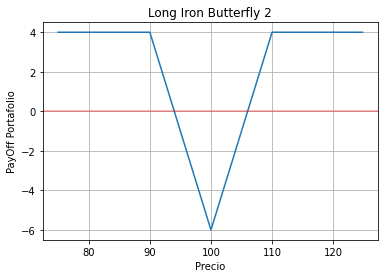

In [27]:
pay_off_total = build_strategy(strategy=long_iron_butterfly_2, price_range=P_range)
plot_result(P_range, pay_off_total, 'Long Iron Butterfly 2')

## Long 3

In [28]:
long_iron_butterfly_3 = {
    'leg_0' : {'BS' : 'B', 'option' : put_payoff, 'K': 95, 'prime' : 0.5},
    'leg_1' : {'BS' : 'S', 'option' : call_payoff, 'K': 100, 'prime' : 3},
    'leg_2' : {'BS' : 'S', 'option' : put_payoff, 'K': 100, 'prime' : 2},
    'leg_3' : {'BS' : 'B', 'option' : call_payoff, 'K': 105, 'prime' : 0.55}
}
P_range = define_range_P(strategy=long_iron_butterfly_3, inf_delta=15, sup_delta=15)

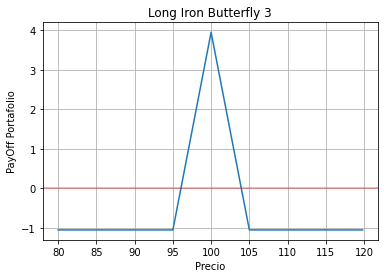

In [29]:
pay_off_total = build_strategy(strategy=long_iron_butterfly_3, price_range=P_range)
plot_result(P_range, pay_off_total, 'Long Iron Butterfly 3')

# Collar

In [30]:
collar = {
    'leg_0' : {'BS' : 'B', 'option' : put_payoff, 'K': 40, 'prime' : 1.99},
    'leg_1' : {'BS' : 'S', 'option' : call_payoff, 'K': 41.72, 'prime' : 1.99},
}
P_range = define_range_P(strategy=collar, inf_delta=5, sup_delta=5)

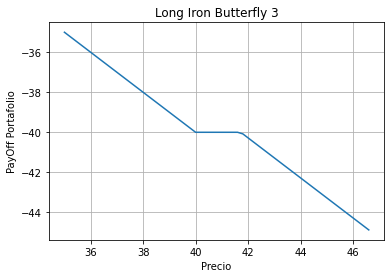

In [31]:
pay_off_total = build_strategy(strategy=collar, price_range=P_range)
pay_off_total -= 40
plot_result(P_range, pay_off_total, 'Long Iron Butterfly 3', with_zero_line=False)

Bernardo, this is all for this homework!!

<hr>

This could not to be the final version, so if you have some recommendation or comment about this, I will be grateful to hear it, using e-mail **craquinterogo@unal.edu.co** or **cristian.quintero@est.uexternado.edu.co**